# HOMEWORK 01

**Submitted by: Diego Sol**

CSCE 636-600: Deep Learning

Professor: Dr. Anxiao Jiang

Code modified from https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter02_mathematical-building-blocks.ipynb


Import Packages

In [62]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

# Task 1

**For the neural network in the Jupiter notebook for the MNIST task (which has 2 layers, where the first layer has 512 neurons and the second layer has 10 neurons), adjust the size of the first layer (namely, the number of neurons in the first layer) as: 16, 32, 64, 128, 256, 512. For each size, train the neural network and record its test accuracy (namely, accuracy on the test set). Draw a figure, where the x-axis is the size of the first layer, and the y-axis is the test accuracy. Submit your figure.**


Number of neurons in the first layer

In [63]:
num_neurons_L1 = np.array([16,32,64,128,256,512])
annotations_1 = np.ndarray.tolist(num_neurons_L1.astype(str)) # used in labelling points on plot

Track the accuracy for each iteration.

In [64]:
log_test_acc_1 = np.zeros(num_neurons_L1.shape[0])

Iterate design of network structure for the different sizes in the first layer.

In [65]:
# number of neurons in the first layer
for xx in range(num_neurons_L1.shape[0]):
        
    # load the MNIST datset in Keras
    from tensorflow.keras.datasets import mnist
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

    # network architecture
    model = keras.Sequential([
        layers.Dense(num_neurons_L1[xx], activation="relu"), # number of neurons in this layer vary with each iteration
        layers.Dense(10, activation="softmax")
    ])

    # compilation
    model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

    # prepare image data (reshape and normalize)
    train_images = train_images.reshape((60000, 28 * 28))
    train_images = train_images.astype("float32") / 255
    test_images = test_images.reshape((10000, 28 * 28))
    test_images = test_images.astype("float32") / 255

    # train the model
    model.fit(train_images, train_labels, epochs=5, batch_size=128)

    # evaluate model accuracy
    test_loss, test_acc = model.evaluate(test_images, test_labels)

    # log accuracy for each iteration
    log_test_acc_1[xx] = test_acc
    print(f"number of neurons in first layer: {num_neurons_L1[xx]}")
    print(f"test accuracy: {test_acc}")

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5922 - accuracy: 0.8441
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2926 - accuracy: 0.9169
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2561 - accuracy: 0.9271
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2341 - accuracy: 0.9339
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2073 - accuracy: 0.9388
number of neurons in first layer: 16
test accuracy: 0.9387999773025513
Epoch 1/5
469/469 [==============================] - 3s 3ms/step - loss: 0.4929 - accuracy: 0.8672
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2416 - accuracy: 0.9313
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1968 - accuracy: 0.9439
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1689 - accuracy: 0.9509
Epoch 5/5
313/313 [===================

Print outputs.

In [66]:
print("\n\nModel accuracy with different number of neurons in the first layer")
print("--------------------------------------------------")
for ii in range(num_neurons_L1.shape[0]):
    print(f"\nneurons in first layer: {num_neurons_L1[ii]}")
    print(f"test_acc: {log_test_acc_1[ii]}")



Model accuracy with different number of neurons in the first layer
--------------------------------------------------

neurons in first layer: 16
test_acc: 0.9387999773025513

neurons in first layer: 32
test_acc: 0.9570000171661377

neurons in first layer: 64
test_acc: 0.9671000242233276

neurons in first layer: 128
test_acc: 0.9728000164031982

neurons in first layer: 256
test_acc: 0.9786999821662903

neurons in first layer: 512
test_acc: 0.9797000288963318


Plot outputs.

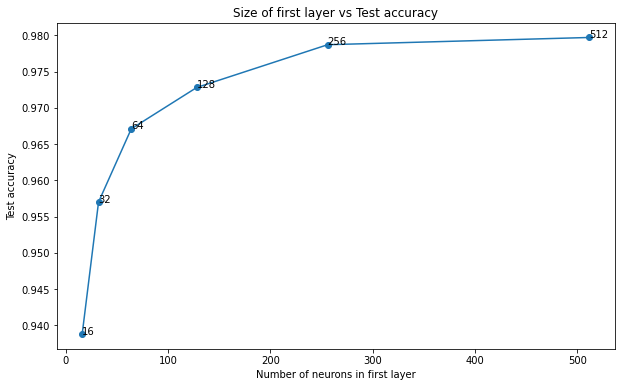

In [67]:
fig1, ax1 = plt.subplots()
ax1.plot(num_neurons_L1,log_test_acc_1,marker='o')
for jj, label in enumerate(annotations_1):
    ax1.text(num_neurons_L1[jj],log_test_acc_1[jj],label)
ax1.set_title("Size of first layer vs Test accuracy")
ax1.set_xlabel("Number of neurons in first layer")
ax1.set_ylabel("Test accuracy")
fig1.set_size_inches(10,6)

We can see from this figure that as the number of neurons in the second layer increase, the accuracy also increases. From visual inspection, this accuracy appears to increase at a logarithmic rate. This means that initially, small incremements in neurons have a bigger effect on the accuracy. Larger increments will see smaller and smaller increments in the accuracy.

Though it is not shown here, multiple runs of this Python script yield highly similar results when compared to each other. In other words, the data outputs in the figure above can consistently be achieved with this code, and it varies minimally with the random variations in batches between runs.

# Task 2

**For the neural network in the Jupiter notebook for the MNIST task (which has 2 layers, where the first layer has 512 neurons and the second layer has 10 neurons), adjust the number of layers to be: 2, 3, 4, 5. (The last layer has to have size 10 since we have 10 classes. But you can decide on the sizes of the other layers.) For each case, train the neural network and record its test accuracy. Draw a figure, where the x-axis is the number of layers, and the y-axis is the test accuracy. Submit your figure, and specify the sizes of your layers for each case.**

Number of layers in the network

In [68]:
num_layers = np.array([2,3,4,5])

Track the accuracy for each iteration.

In [69]:
log_test_acc_2 = np.zeros((num_layers.shape[0],num_neurons_L1.shape[0]))

Declare the number of neurons for each layer.

In [70]:
num_neurons = num_neurons_L1 # same as in TASK 1

Iterate over different numbers of layers and neurons within those layers

In [71]:
# number of layers in the network
for yy in range(num_layers.shape[0]):

    # number of neurons per layer (except last)
    for xx in range(num_neurons.shape[0]):

        # load the MNIST datset in Keras
        from tensorflow.keras.datasets import mnist
        (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

        # create network
        model = keras.Sequential()

        # network architecture: add layers that vary wither iterations
        for zz in range(num_layers[yy]):
            model.add(layers.Dense(num_neurons[xx], activation='relu'))

        # final layer is always the same
        model.add(layers.Dense(10, activation='softmax'))

        # compilation
        model.compile(optimizer="rmsprop",
                    loss="sparse_categorical_crossentropy",
                    metrics=["accuracy"])

        # prepare image data (reshape and normalize)
        train_images = train_images.reshape((60000, 28 * 28))
        train_images = train_images.astype("float32") / 255
        test_images = test_images.reshape((10000, 28 * 28))
        test_images = test_images.astype("float32") / 255

        # train the model
        model.fit(train_images, train_labels, epochs=5, batch_size=128)

        # evaluate model accuracy
        test_loss, test_acc = model.evaluate(test_images, test_labels)

        # log accuracy for each iteration
        log_test_acc_2[yy][xx] = test_acc
        print(f"number of layers in the network: {num_layers[yy]}")
        print(f"number of neurons per layer: {num_neurons[xx]}")
        print(f"test accuracy: {test_acc}")

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6588 - accuracy: 0.8183
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2987 - accuracy: 0.9157
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2604 - accuracy: 0.9260
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2364 - accuracy: 0.9332
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2191 - accuracy: 0.9382
number of layers in the network: 2
number of neurons per layer: 16
test accuracy: 0.9381999969482422
Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.4659 - accuracy: 0.8680
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2219 - accuracy: 0.9359
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1782 - accuracy: 0.9481
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1522 - accuracy: 0.9556
Epoch 5/

Print outputs.

In [76]:
print(f"Model accuracy with different number of layers in the network")
print("--------------------------------------------------\n")
for ii in range(num_layers.shape[0]):
    for jj in range(num_neurons.shape[0]):
        print(f"number of layers in the network: {num_layers[ii]}")
        print(f"number of neurons per layer: {num_neurons[jj]}")
        print(f"test_acc: {log_test_acc_2[ii][jj]}\n")

Model accuracy with different number of layers in the network
--------------------------------------------------

number of layers in the network: 2
number of neurons per layer: 16
test_acc: 0.9381999969482422

number of layers in the network: 2
number of neurons per layer: 32
test_acc: 0.9575999975204468

number of layers in the network: 2
number of neurons per layer: 64
test_acc: 0.9699000120162964

number of layers in the network: 2
number of neurons per layer: 128
test_acc: 0.9772999882698059

number of layers in the network: 2
number of neurons per layer: 256
test_acc: 0.9768999814987183

number of layers in the network: 2
number of neurons per layer: 512
test_acc: 0.9779000282287598

number of layers in the network: 3
number of neurons per layer: 16
test_acc: 0.9416000247001648

number of layers in the network: 3
number of neurons per layer: 32
test_acc: 0.9563999772071838

number of layers in the network: 3
number of neurons per layer: 64
test_acc: 0.9700000286102295

number of 

Plot outputs.

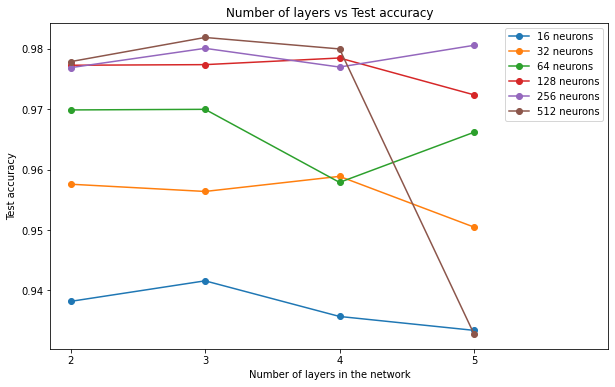

In [73]:
fig2, ax2 = plt.subplots()
for ii in range(num_neurons.shape[0]):
    ax2.plot(num_layers,log_test_acc_2[:,ii],marker='o',label=str(num_neurons[ii]) + ' neurons')
ax2.set_title("Number of layers vs Test accuracy")
ax2.set_xlabel("Number of layers in the network")
ax2.set_ylabel("Test accuracy")
ax2.set_xticks(num_layers)
ax2.set_xlim([1.85,6])
ax2.legend(loc='best')
fig2.set_size_inches(10,6)

We can see from this figure that as the number of layers in the network increase, the accuracy for each of the curves varies slightly in a seemingly random fashion. This means that adding more layers to the neural network will not consitently increase the test accuracy (at least not for hidden layers that share the same number of neurons).

Though it is not shown here, multiple runs of this Python script yield different results when compared to each other. The variations appear the same in magnitude, but precise peaks and dips in accuracy for each curve changes based on the run. In other words, the exact data outputs in the figure above cannot consistently be achieved with this code, and it varies with the random variations in batches between runs.